In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pyplot as plt


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

NameError: ignored

In [ ]:
#df = unpickle("/content/drive/MyDrive/Visao Computacional/cifar-10-python/data_batch_5");

### Transformações de Intensidade

1. Alargamento de contraste
* s = 1/(1+(k/r)^e)
    * A constante k é um fator de proporcionalidade que determina a intensidade inicial do sinal
    * r é a distância percorrida pelo sinal até o ponto em que sua intensidade é medida.
    * A constante e é um expoente que determina a taxa de atenuação do sinal.

In [ ]:
def alargamento_de_contraste(imagem, k, e):
    altura, largura = imagem.shape

    # Aplica a função de atenuação para cada pixel da imagem
    for i in range(altura):
        for j in range(largura):
            imagem[i, j] = 1/(1+((k/imagem[i, j])**e))

    return imagem

In [ ]:
imagem = imread("1275115.jpg")
imagem = rgb2gray(imagem)

In [ ]:
# exmplo de aplicação do alargamento de contraste
imagem_com_contraste_alargado = alargamento_de_contraste(imagem, 1, 2)

#imsave("img.jpg",imagem_com_contraste_alargado)

<ipython-input-73-db9f0c475431>:7: RuntimeWarning: divide by zero encountered in double_scalars
  imagem[i, j] = 1/(1+((k/imagem[i, j])**e))


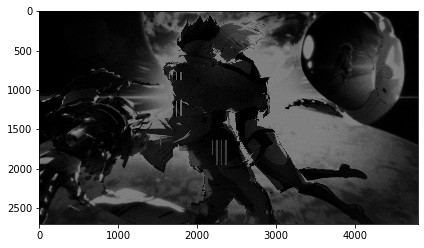

In [ ]:
imshow(imagem_com_contraste_alargado, cmap="gray")

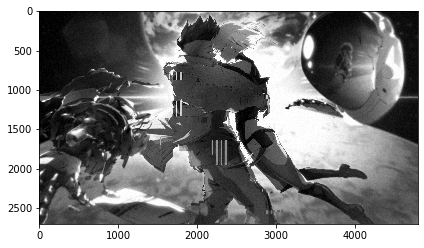

In [ ]:
imshow(imagem, cmap="gray")

2. Negativo
* s = L - 1 - r

In [ ]:
def negativa(imagem):
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            imagem[i, j] = 255 - 1 - imagem[i, j]
    return imagem

def negative_s1mple(image):
    return 255 - image

In [ ]:
imagem = imread("/content/automobile4.png")
imagemg = rgb2gray(imagem)

In [ ]:
img = negativa(imagemg)

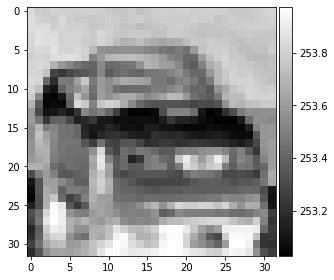

In [ ]:
imshow(img, cmap="gray")

3. Logarítmico
* s = c*log(1+r)
    * R = valor de pixel de entrada,
    * C = constante de escala ( O valor de 'c' é escolhido de forma que obtenhamos o valor máximo de saída correspondente ao tamanho do bit usado. Portanto, a fórmula para calcular 'c' é a seguinte: 
        * c = 255 / (log (1 + max_input_pixel_value)))

In [ ]:
import math

def logaritmica(c,r):
    return c * np.log(1 + r)


def log_aplicada(imagem, c):
    c = 255 / np.log(1 + np.max(imagem))
    # Cria uma imagem resultado com o mesmo shape da imagem de entrada
    result = np.empty_like(imagem)
    
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            result[i, j] = logaritmica(c, imagem[i][j])
    return result


4. Potência
* s = c*r^Y

In [ ]:
def potencia(imagem, c, y):
    altura, largura = imagem.shape[:2]
    result = np.empty_like(imagem)
    for i in range(altura):
        for j in range(largura):
            result[i, j] = c*(imagem[i, j] ^ y)
    return result